In [15]:
# Cargar el dataset:

from sklearn.datasets import load_breast_cancer
bc_data = load_breast_cancer

In [3]:
# Importar librerías necesarias:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [4]:
#Se crea la variable para los nombres de las columnas y para las variables independiente (X) y dependientes (y):
cols = bc_data.feature_names
cols
X = bc_data.data
y = bc_data.target
X.head()

In [5]:
#Cuenta la cantidad de registros por cada clase:

from collections import Counter
Counter(y)

Counter({1: 357, 0: 212})

In [6]:
#Se escalan todos los datos:

escalar = MinMaxScaler()
X_esc = escalar.fit_transform(X)

In [7]:
#Separar conjuntos de entrenamiento y de pruebas:

X_train, X_test, y_train, y_test = train_test_split(X_esc, y, test_size=0.2, random_state = 200)

In [8]:
#Cantidad de registros por cada clase del set de entrenamiento:

Counter(y_train)

Counter({1: 281, 0: 174})

In [9]:
#Perceptrón Multicapa MLP:

mlp_clf = MLPClassifier(solver='adam',
                    alpha=1e-3,
                    hidden_layer_sizes=(100,),
                    max_iter = 500,
                    activation ='relu',
                    random_state=0)

In [10]:
#Entrenamiento:

mlp_clf.fit(X_train, y_train)

MLPClassifier(alpha=0.001, max_iter=500, random_state=0)

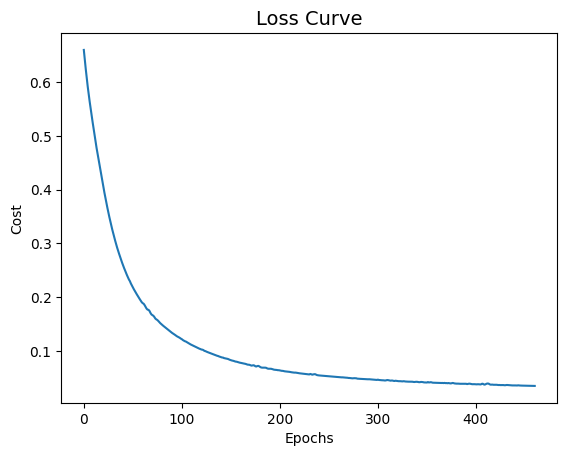

In [11]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [12]:
#Predicciones:

y_pred = mlp_clf.predict(X_test)

df = pd.DataFrame({'Predicción': y_pred, 'Real': y_test})
df.head(10)

,Predicción,Real
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


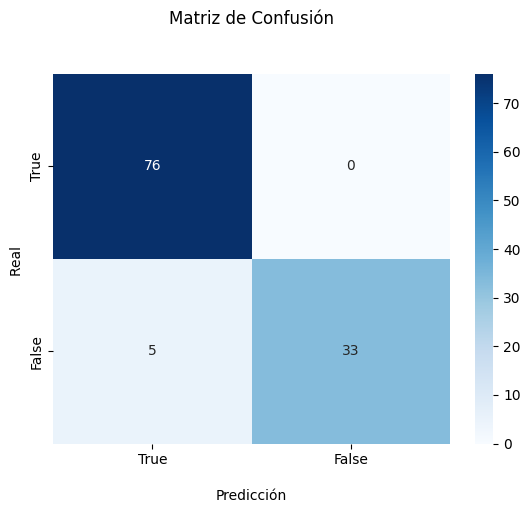

In [ ]:
#Matriz de confusión:
def matriz_confusion(y_test,y_pred):
    import matplotlib.pyplot as plt
    import seaborn as sns
    #Verifico la matriz de Confusión
    from sklearn.metrics import confusion_matrix
    matriz = confusion_matrix(y_test, y_pred,labels=[1, 0])

    ax = sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g')
    ax.set_title('Matriz de Confusión\n\n');
    ax.set_xlabel('\nPredicción')
    ax.set_ylabel('Real ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['True','False'])
    ax.yaxis.set_ticklabels(['True','False'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()


matriz_confusion(y_test,y_pred)

In [ ]:
#Algunas métricas:
def calcula_metricas(nombre_algoritmo,y_test,y_pred):
### CLASE POSITIVA (1) ###
    #Calculo la precisión del modelo
    from sklearn.metrics import precision_score
    precision = precision_score(y_test, y_pred)

    #Calculo la exactitud del modelo
    from sklearn.metrics import accuracy_score
    exactitud = accuracy_score(y_test, y_pred)

    #Calculo la sensibilidad del modelo
    from sklearn.metrics import recall_score
    sensibilidad = recall_score(y_test, y_pred)

    #Calculo el Puntaje F1 del modelo
    from sklearn.metrics import f1_score
    puntajef1 = f1_score(y_test, y_pred)

    #Calculo la curva ROC - AUC del modelo
    from sklearn.metrics import roc_auc_score
    roc_auc = roc_auc_score(y_test, y_pred)

### CLASE NEGATIVA (0) ###
    from sklearn.metrics import confusion_matrix
    labels = [1, 0]
    cm = confusion_matrix(y_test, y_pred, labels = labels)
    tp,fn,fp,tn = cm.ravel()

    #True Negative Rate / specificity
    TNR_recall_espec = round(tn/(tn+fp),6)

    #Negative Predictive Value
    NPV_precision = round(tn/(tn+fn),6)

    #Cálculo del F1 para la clase negativa
    F1_neg = round(2 * (NPV_precision * TNR_recall_espec) / (NPV_precision + TNR_recall_espec),2)

    ## Vector de Desempeño - Resumen de Métricas del Modelo
    df_1 = pd.DataFrame({'Modelo': [nombre_algoritmo],'Clase ':[1],'Exactitud': [exactitud],'Precisión': [precision],
                   'Sensibilidad': [sensibilidad], 'F1': [puntajef1],'AUC': [roc_auc]})
    df_2 = pd.DataFrame({'Modelo': '','Clase ':[0],'Exactitud': '','Precisión': [NPV_precision],
                   'Sensibilidad': [TNR_recall_espec], 'F1': [F1_neg],'AUC': ''})
    df = df_1.append(df_2, ignore_index = True)

    return df.style.hide_index()


df_metricas_mlp = calcula_metricas('MLP',y_test,y_pred)
df_metricas_mlp

<ipython-input-130-17d8dff8d4a0>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_1.append(df_2, ignore_index = True)
<ipython-input-130-17d8dff8d4a0>:46: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  return df.style.hide_index()


Modelo,Clase,Exactitud,Precisión,Sensibilidad,F1,AUC
MLP,1,0.956140,0.938272,1.000000,0.968153,0.934211
,0,,1.000000,0.868421,0.930000,


In [ ]:
# Guardar el modelo:

import pickle

archivo_pkl= 'modelo_mlp.pkl'
pickle.dump(mlp_clf, open(archivo_pkl, 'wb'))